In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict
import math
from sklearn.preprocessing import StandardScaler
from itertools import product
from sklearn import metrics
from random import shuffle
import re

In [2]:
from random_dataset import create_random_dataset
from evolutionary_algorithm import EA
from greedy_algorithm import GreedyAlgorithm
from neg_sel import NegativeSelection, load_data

# Languages

In [7]:
char_aminoacids = [ '_', 'a', 'b', 'c', 'd', 'e',
	'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n',
	'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z' ]
allowed = set(char_aminoacids)

In [8]:
languages_data_dir = "./data/languages/"
english_data_dir = languages_data_dir + "english/"
input_path = english_data_dir + "moby_dick.txt"
output_path = english_data_dir + "english_6_train.txt"

with open(input_path, "r", encoding="utf-8") as f:
    text = f.read().lower()

processed = ''.join([c if c in allowed else '_' for c in text])

# remove any uncesseary '_' characters
processed = re.sub(r'_+', '_', processed)

length = 6
lines = [processed[i:i+length] for i in range(0, len(processed), length)]

# lines must have character amount equal to length
lines = [line for line in lines if len(line) == length]

with open(output_path, "w", encoding="utf-8") as f:
    f.write('\n'.join(lines))

In [10]:
# create test set
import random

languages_data_dir = "./data/languages/"
english_data_dir = languages_data_dir + "english/"
input_path = english_data_dir + "bible.txt"
output_path = english_data_dir + "english_6_test.txt"

with open(input_path, "r", encoding="utf-8") as f:
    text = f.read().lower()

processed = ''.join([c if c in allowed else '_' for c in text])

# remove any uncesseary '_' characters
processed = re.sub(r'_+', '_', processed)

length = 6
lines = [processed[i:i+length] for i in range(0, len(processed), length)]

# lines must have character amount equal to length
lines = [line for line in lines if len(line) == length]

sample_size = 2000
sampled_lines = random.sample(lines, sample_size)

with open(output_path, "w", encoding="utf-8") as f:
    f.write('\n'.join(sampled_lines))

In [26]:
# Create more test sets
import os
languages_other_data_dir = "./data/languages/other/"

sample_size = 2000

for filename in os.listdir(languages_other_data_dir):
    if filename.endswith(".txt"):
        input_path = os.path.join(languages_other_data_dir, filename)
        base, ext = os.path.splitext(filename)
        output_filename = f"{base}_test{ext}"
        output_path = os.path.join(languages_other_data_dir, output_filename)

        with open(input_path, "r", encoding="utf-8") as f:
            text = f.read().lower()
        processed = ''.join([c if c in allowed else '_' for c in text])
        processed = re.sub(r'_+', '_', processed)
        lines = [processed[i:i+length] for i in range(0, len(processed), length)]
        lines = [line for line in lines if len(line) == length]

        if len(lines) < sample_size:
            print(f"Not enough lines in {filename} with only {len(lines)}")
            continue

        sampled_lines = random.sample(lines, sample_size)

        with open(output_path, "w", encoding="utf-8") as f:
            f.write('\n'.join(sampled_lines))

# Language Discrimination

In [11]:
english_train_path = english_data_dir + "english_6_train.txt"
self_english_data = pd.read_csv(english_train_path, header=None)

sampled_english_data = create_random_dataset(df=self_english_data, n=10000, seed=42)
sampled_english_data = sampled_english_data[0].to_list()

len(sampled_english_data)

10000

## Greedy Algorithm 

In [19]:
amino_acids = "_abcdefghijklmnopqrstuvwxyz"

motifs = ["".join(motif) for motif in product(amino_acids, repeat=6)]

print(f"Total number of motifs: {len(motifs)}")

Total number of motifs: 387420489


In [20]:
num_sampled_motifs = math.ceil(len(motifs) * 0.01)
sampled_motifs = random.sample(motifs, num_sampled_motifs)

In [22]:
greedy_optimizer = GreedyAlgorithm(peptides=sampled_english_data, motifs=sampled_motifs, t=3, seed=42)
optimized_dataset = greedy_optimizer.run()

with open(english_data_dir + "greedy_english_10000_1.txt", "w") as f:
    for item in optimized_dataset:
        f.write(f"{item}\n")
        
print(f"Size of greedily optimized data set: {len(optimized_dataset)}")

test12
Size of greedily optimized data set: 3574


## Random Sampling

In [12]:
random_dataset = create_random_dataset(df=self_english_data[:10000], n=3600, seed=42)

random_dataset_list = random_dataset[0].to_list()
random_dataset_list

['g_bed_',
 'nd_of_',
 'and_jo',
 'd_desi',
 'ing_no',
 'chor_s',
 'aco_wh',
 'attres',
 'small_',
 '_needl',
 'r_coff',
 'were_r',
 'ump_ag',
 'yond_m',
 '_indee',
 '_liabl',
 'loys_t',
 '_skyla',
 'ort_or',
 'thank_',
 'arpoon',
 'ent_wh',
 'ittle_',
 'from_s',
 'it_of_',
 'asantl',
 's_proc',
 'nty_gr',
 'ng_lik',
 '_done_',
 'tter_s',
 'ness_a',
 'nder_t',
 '_was_n',
 'f_him_',
 'rs_tha',
 'come_j',
 'of_a_d',
 'h_it_w',
 'parade',
 '_some_',
 'he_wat',
 'with_h',
 'e_the_',
 'sounds',
 'rld_it',
 '_have_',
 '_nervo',
 'being_',
 '_stree',
 'ed_and',
 'lookin',
 'ould_a',
 '_ee_be',
 '_poor_',
 'ng_int',
 'gainst',
 'o_curt',
 'came_t',
 'les_al',
 'e_been',
 'n_deli',
 'ought_',
 'preven',
 'sfacti',
 'uldn_t',
 'outer_',
 'd_hand',
 'e_slep',
 't_poor',
 'm_into',
 'why_di',
 'ere_pl',
 'feet_o',
 'her_th',
 '_be_af',
 'es_to_',
 'in_my_',
 '_when_',
 'ber_mu',
 'n_roun',
 'a_salt',
 'r_but_',
 'ney_wi',
 'ool_as',
 'be_in_',
 'y_besm',
 'here_a',
 '_lost_',
 'the_la',
 'ese_co',

In [13]:
with open("./data/languages/english/english_6_random.txt", "w") as f:
    for item in random_dataset_list:
        f.write(f"{item}\n")

## Negative Selection

In [ ]:
normal_path = "./data/languages/english/english_6_test.txt"
anomalous_path = "./data/languages/other/hiligaynon_test.txt"
result_path = "./data/languages/results/"

languages = ["hiligaynon", "latin", "middle_english", "plautdietsch", "tagalog", "xhosa"]
# languages = ["latin", "middle_english", "plautdietsch", "tagalog"]

r_start = 1
r_stop = 6

ns = NegativeSelection(
    "/data/languages/english.alpha", "./data/languages/english/english_6_greedy.txt", r_start=r_start, r_stop=r_stop, n=6
)

In [ ]:
ns.run(normal_path, result_path, "greedy")

In [4]:
for language in languages:
    anomalous_path = "./data/languages/other/" + language + "_test.txt"
    ns.run(anomalous_path, result_path, "random")

### Calculate metrics of negative selection

In [12]:
def preprocess_data(data: pd.DataFrame, r: int):
    anomalous_data = data[data["anomalous"] == 1]
    sensitivity = len(anomalous_data[anomalous_data["score"] > r]) / len(anomalous_data)

    non_anomalous_data = data[data["anomalous"] == 0]
    specificity = len(non_anomalous_data[non_anomalous_data["score"] < r]) / len(non_anomalous_data)

    data["y"] = data["score"] > r

    return anomalous_data, non_anomalous_data, data


def caclulate_roc_auc(data):
    fpr, tpr, thresholds = metrics.roc_curve(data["anomalous"], data["score"])
    auc = metrics.roc_auc_score(data["anomalous"], data["score"])
    roc = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc)

    return auc, roc

#### Roc plots

/home/vaggelis_spithas/Documents/ru/naco/projects/NaCo_Project/.naco310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/vaggelis_spithas/Documents/ru/naco/projects/NaCo_Project/.naco310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


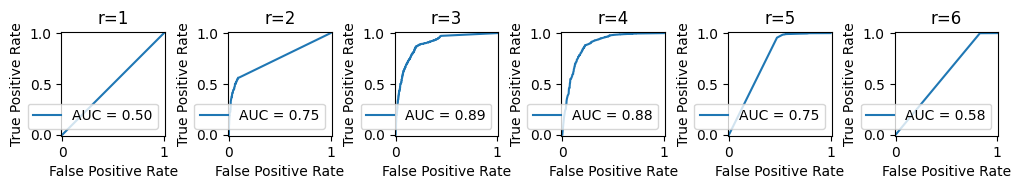

In [13]:
pd.set_option('future.no_silent_downcasting', True) # opt-in for future behavior of replace

fig, ax = plt.subplots(1, r_stop, figsize=(10, 10), constrained_layout=True)

acc_list = []
err_rate_list = []
f1_list = []
precision_list = []
recall_list = []

for r in range(r_start, r_stop + 1):
    anomalous_data = load_data(anomalous_path, r, result_path, 1)
    normal_data = load_data(normal_path, r,result_path, 0)
    data = pd.concat([anomalous_data, normal_data])

    _, _, data = preprocess_data(data, r)
    # display(data.head())

    auc, roc = caclulate_roc_auc(data)
    axis = ax[r - 1]
    roc.plot(ax=axis)
    axis.set_title(f"r={r}")


    y_true = data['anomalous'].to_list()
    y_pred = data['y'].replace({True: 1, False: 0}).to_list()
    acc = metrics.accuracy_score(y_true, y_pred)
    err_rate = 1 - acc

    f1 = metrics.f1_score(y_true, y_pred)
    precision = metrics.precision_score(y_true, y_pred)
    recall = metrics.recall_score(y_true, y_pred)

    acc_list.append(acc)
    err_rate_list.append(err_rate)
    f1_list.append(f1)
    precision_list.append(precision)
    recall_list.append(recall)

#### Accuracy and Error Rate plots

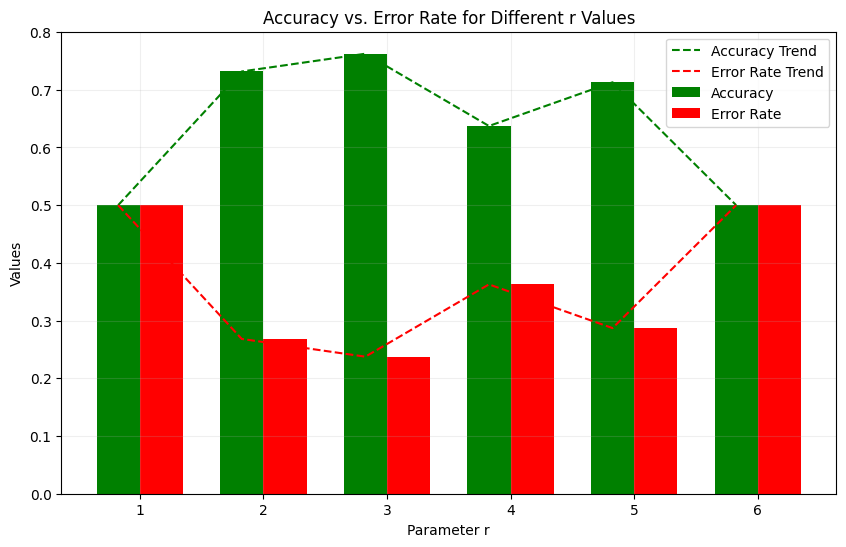

In [14]:
r_values = [r for r in range(r_start, r_stop + 1)]
bar_width = 0.35
x = np.arange(len(r_values))

plt.figure(figsize=(10, 6))

plt.bar(x, acc_list, bar_width, label='Accuracy', color='green')
plt.bar(x + bar_width, err_rate_list, bar_width, label='Error Rate', color='red')

# Add trend lines for accuracy and error rates
# Use moving average for the trend line (smooth line)
window = 1  # Number of points to average over
accuracy_trend = np.convolve(acc_list, np.ones(window)/window, mode='valid')
error_trend = np.convolve(err_rate_list, np.ones(window)/window, mode='valid')

plt.plot(x[window-1:], accuracy_trend, 'g--', label='Accuracy Trend')
plt.plot(x[window-1:], error_trend, 'r--', label='Error Rate Trend')

plt.xlabel('Parameter r')
plt.ylabel('Values')
plt.title('Accuracy vs. Error Rate for Different r Values')
plt.xticks(x + bar_width / 2, r_values)  # Center the x-tick labels
plt.legend()
plt.grid(True, alpha=0.2)

plt.show()

#### F1, Precision and Recall Plots

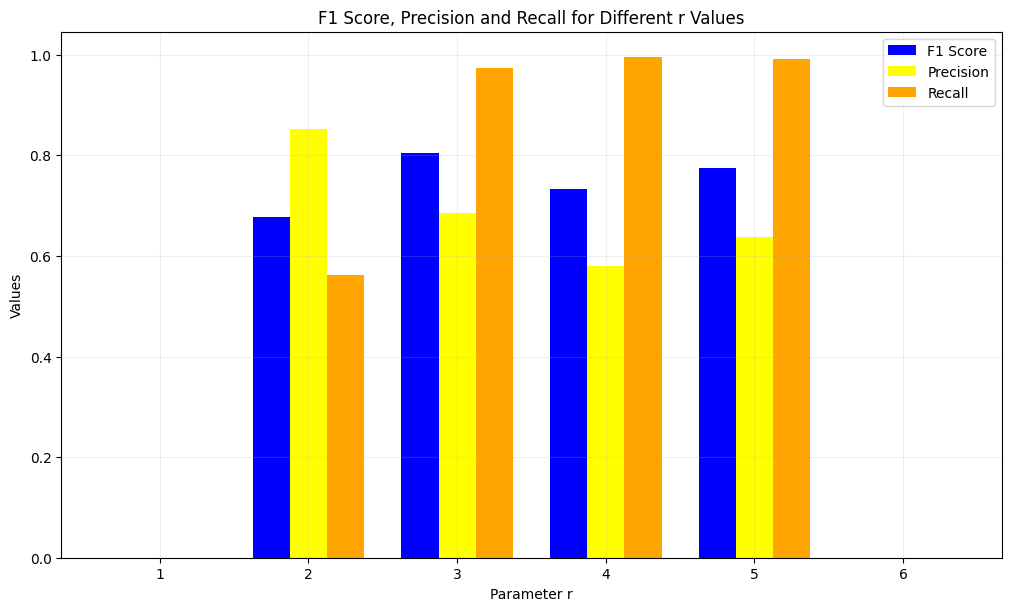

In [15]:
bar_width = 0.25

# plt.figure(figsize=(10, 6))
fig, ax = plt.subplots(layout='constrained', figsize=(10, 6))

ax.bar(x, f1_list, bar_width, label='F1 Score', color='blue')
ax.bar(x + bar_width, precision_list, bar_width, label='Precision', color='yellow')
ax.bar(x + 2*bar_width, recall_list, bar_width, label='Recall', color='orange')


ax.set_xlabel('Parameter r')
ax.set_ylabel('Values')
ax.set_title('F1 Score, Precision and Recall for Different r Values')
ax.legend()
ax.set_xticks(x + bar_width, r_values)
ax.grid(True, alpha=0.2)

plt.show()